# Santander Value Prediction Challenge
### Predict the value of transactions for potential customers

## Description

According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Data files
DATA_DIR = 'input/santander'
file_dir = {'test': os.path.join(DATA_DIR, 'test.csv'),
              'train': os.path.join(DATA_DIR, 'train.csv')}

In [2]:
%%time
# CSV Files
train = pd.read_csv(file_dir['train'])
train.head()

Wall time: 3.13 s


In [3]:
# Separo los features del conjunto de datos
features = train.drop(['ID','target'],axis=1)
features.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
train.shape

(4459, 4993)

In [5]:
# Analizamos el porcentaje de ceros
num_filas = features.shape[0]
num_columnas = features.shape[1]
num_zeros_per_feature = (features == 0).sum()
percentage_of_nulls = num_zeros_per_feature / num_filas
percentage_of_nulls.head()

48df886f9    0.991254
0deb4b6a8    0.999103
34b15f335    0.992599
a8cb14b00    0.999551
2f0771a37    0.998879
dtype: float64

In [6]:
# Para corroborar que sus datos son ceros, examinaremos una distribución
# del feature 'a8cb14b00' que tiene casi el 100% de sus datos con ceros
feature = 'a8cb14b00'
train[feature][train[feature].values > 0]

334     5400000
537    14800000
Name: a8cb14b00, dtype: int64

Se puede verificar que el feature 'a8cb14b00' tiene solamente 2 datos que son mayores a ceros

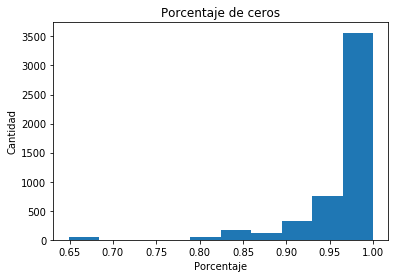

In [7]:
plt.hist(percentage_of_nulls.values)
plt.title("Porcentaje de ceros")
plt.xlabel("Porcentaje")
plt.ylabel("Cantidad")
plt.show()

Una gran cantidad de las variables tiene valores con ceros, se puede observar que existe una separación en el 70% de sus datos

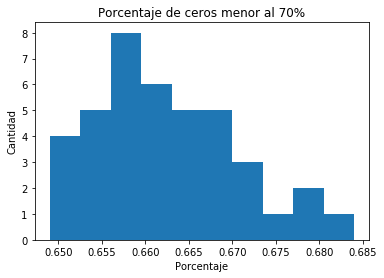

In [8]:
# Se analiza el histograma con variables que tengan menos del 70% de sus datos con cero
less_than_70 = percentage_of_nulls[percentage_of_nulls < 0.7]
plt.hist(less_than_70.values)
plt.title('Porcentaje de ceros menor al 70%')
plt.xlabel('Porcentaje')
plt.ylabel('Cantidad')
plt.show()

Es necesario saber cuantas variables tienen estas características, y de estas variables es necesario conocer como es la distribución de la variables que tiene menor cantidad de ceros

In [9]:
# Cantidad de variables que tienen menos del 70% de sus datos con ceros
print("Variables: {}".format(less_than_70.count()))

Variables: 40


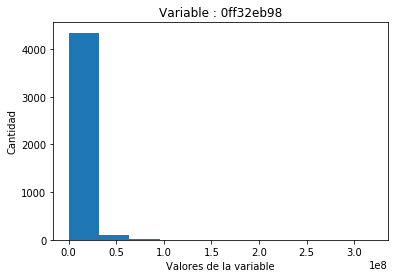

In [10]:
# Distribución de la variable con la menor cantidad de ceros
feature = less_than_70.idxmin()
plt.hist(train[feature].values)
plt.title("Variable : %s" % feature)
plt.xlabel("Valores de la variable")
plt.ylabel("Cantidad")
plt.show()

Los valores de las variable se acercan mas que todo a cero, lo que ocasiona a preguntarse si todas la variables de aquellas que tienen menos del 70% de sus datos con ceros, tienen las mismas características. Por lo que sería mejor realizar un análisis de las medias de todas estas variables.

In [11]:
# Obtenermos una lista de los features
features_less_than_70 = less_than_70.index.values
print(features_less_than_70)

['20aa07010' '963a49cdc' '26fc93eb7' '0572565c2' '66ace2992' 'fb49e4212'
 '6619d81fc' '6eef030c1' 'fc99f9426' '1db387535' 'b43a7cfd5' '024c577b9'
 '2ec5b290f' '0ff32eb98' '58e056e12' '241f0f867' '1931ccfdd' '58e2e02e6'
 '9fd594eec' 'fb0f5dbfe' '91f701ba2' '703885424' 'eeb9cd3aa' '324921c7b'
 '58232a6fb' '491b9ee45' 'd6bb78916' '70feb1494' 'adb64ff71' '62e59a501'
 '15ace8c9f' '5c6487af1' 'f190486d6' 'f74e8f13d' 'c5a231d81' 'e176a204a'
 '1702b5bf0' '190db8488' 'c47340d97' '23310aa6f']


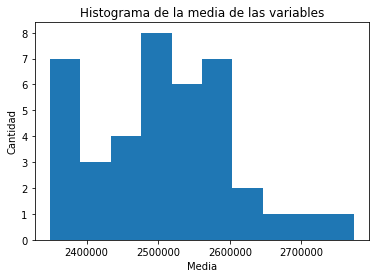

In [12]:
# Se grafica el histograma de las medias
plt.hist(train[features_less_than_70].mean().values)
plt.title('Histograma de la media de las variables')
plt.xlabel('Media')
plt.ylabel('Cantidad')
plt.show()

Según el gráfico la mayoría de las variables tiene una media elevada. Por esto se verificará la distribución de la variable con la media mas elevada.

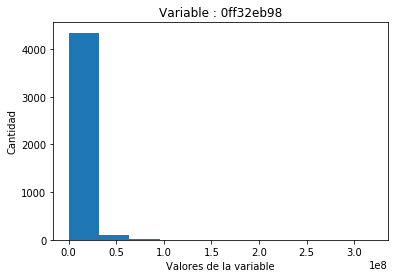

In [13]:
feature = train[features_less_than_70].mean().idxmax()
plt.hist(train[feature].values)
plt.title("Variable : %s" % feature)
plt.xlabel("Valores de la variable")
plt.ylabel("Cantidad")
plt.show()

La variable con la mayor media es la que menos datos con ceros tiene. Por lo cual no me indica si todos los otros valores se encuentra cerca de cero. Se verificará la desviación estandar de todas las variables.

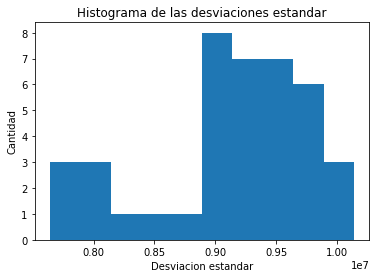

In [14]:
# Se grafica el histograma de las desviaciones estandar
plt.hist(train[features_less_than_70].std().values)
plt.title('Histograma de las desviaciones estandar')
plt.xlabel('Desviacion estandar')
plt.ylabel('Cantidad')
plt.show()

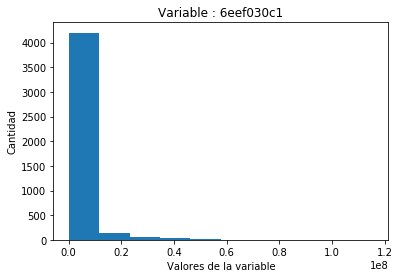

In [15]:
# Verificar la variable con menor distribucion estandar
feature = train[features_less_than_70].std().idxmin()
plt.hist(train[feature].values)
plt.title("Variable : %s" % feature)
plt.xlabel("Valores de la variable")
plt.ylabel("Cantidad")
plt.show()

También la mayoría de sus variables se encuentran cerca de cero. Mi pregunta es si acaso ocurre lo mismo para los valores de todas las variables con la menor desviación estandar

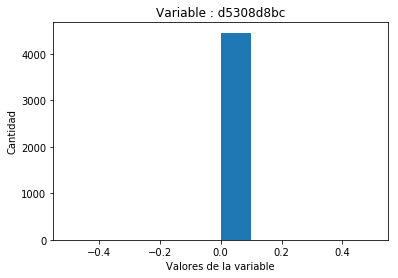

In [16]:
# Verificar la variable con menor distribucion estandar
feature = features.std().idxmin()
plt.hist(train[feature].values)
plt.title("Variable : %s" % feature)
plt.xlabel("Valores de la variable")
plt.ylabel("Cantidad")
plt.show()

Lo que se requiere saber es la cantidad de variables que tienen sus valores menor a 0.5

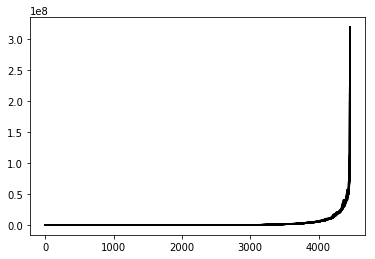

In [17]:
# Obtener las variables que sean mayor que cero y menor que 0.5
df = train[features_less_than_70]
df = df.apply(lambda x: x.sort_values().values)
plt.plot(df,color='black')
plt.show()

La gran mayoría de las variables tiene valores muy bajos, cercanos a cero, por lo que al parecer las variables deben ser valores como tasa de variación o que indican algún tipo de cambio. Siendo así me gustaría examinar cuales son los 10 maximos valores alcanzados

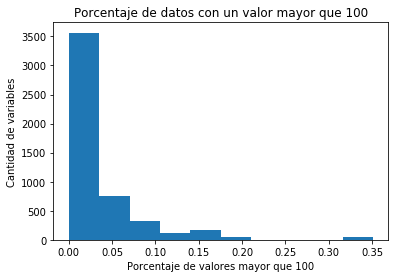

In [18]:
porcentaje_greater_100 = (features > 1).sum() / num_filas
plt.hist(porcentaje_greater_100)
plt.title('Porcentaje de datos con un valor mayor que 100')
plt.xlabel('Porcentaje de valores mayor que 100')
plt.ylabel('Cantidad de variables')
plt.show()

Existe algunas variables que tienen el 35% de sus datos mayor que 100, la gran mayoría de las variables tiene el 5% de sus datos mayor que 100, es decir que son valores muy atipicos. Por lo que se tiene que tratar esos datos. Sería bueno observar los que son menores a 5%

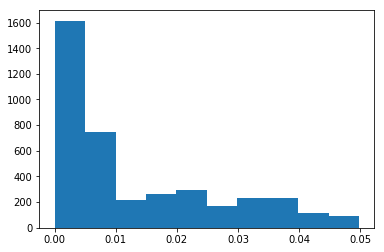

In [19]:
plt.hist(porcentaje_greater_100[porcentaje_greater_100 < 0.05])
plt.show()

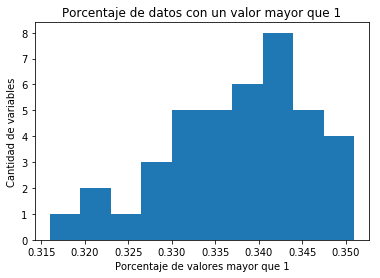

In [20]:
porcentaje_greater_100 = (train[features_less_than_70] > 1).sum() / num_filas
plt.hist(porcentaje_greater_100)
plt.title('Porcentaje de datos con un valor mayor que 1')
plt.xlabel('Porcentaje de valores mayor que 1')
plt.ylabel('Cantidad de variables')
plt.show()

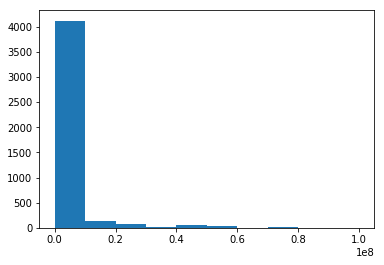

In [21]:
feature = porcentaje_greater_100.idxmax()
values = train[feature][train[feature] < 2e8]
plt.hist(values.values)
plt.show()

## Entrenamiento del modelo

In [22]:
# Load Own functions
def standardize( df, numeric_online=True):
    numeric = df.select_dtypes(include=['int64','float64'])
    
    #substract mean and divide by std
    df[numeric.columns] = ( numeric - numeric.mean() ) / numeric.std() 
    
    return df

In [23]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [24]:
# Load Base Line
dataBL = train
dataBL = dataBL.drop(['ID'],axis=1)
dataBL.tail()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4454,1065000.0,0.0,0,0.0,0,0,0,0,0,70000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,48000.0,0.0,0,0.0,0,0,0,0,0,375000.0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,2800000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4458,20000000.0,0.0,0,0.0,0,0,0,0,0,20000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [25]:
# Feature reduction
percentage_zeros_accepted = 0.7
data00 = dataBL
data00 = data00.drop(['target'],axis=1)
percentage_zeros = (data00 == 0).mean()
features = percentage_zeros[percentage_zeros < percentage_zeros_accepted]
features = features.index.values
data00 = data00[features]
data00 = data00.assign(target = dataBL['target'])
data00.head()

,20aa07010,963a49cdc,26fc93eb7,0572565c2,66ace2992,fb49e4212,6619d81fc,6eef030c1,fc99f9426,1db387535,...,5c6487af1,f190486d6,f74e8f13d,c5a231d81,e176a204a,1702b5bf0,190db8488,c47340d97,23310aa6f,target
0,0.0,13200000.0,3205000.0,400000.0,0.0,0.0,400000.0,900000.0,0.0,0.0,...,0.0,1866666.66,1733333.34,0.0,0.0,0.0,0.0,0.0,0.0,38000000.0
1,2200000.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,16000000.0,0.0,0.0,0.0,600000.0
2,0.0,12000000.0,0.0,0.0,5500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2000000.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0
4,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,37662000.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,8000000.0,0.0,14400000.0


In [26]:
# Estandarizar los datos
data01 = data00
data01 = data01.drop(['target'],axis=1)
data01 = standardize(data01)
data01 = data01.assign(target = data00['target'])
data01.head()

,20aa07010,963a49cdc,26fc93eb7,0572565c2,66ace2992,fb49e4212,6619d81fc,6eef030c1,fc99f9426,1db387535,...,5c6487af1,f190486d6,f74e8f13d,c5a231d81,e176a204a,1702b5bf0,190db8488,c47340d97,23310aa6f,target
0,-0.267363,1.182401,0.109472,-0.226592,-0.271268,-0.300077,-0.224205,-0.190911,-0.297461,-0.267547,...,-0.265666,-0.078407,-0.079043,-0.270703,-0.265186,-0.303607,-0.265673,-0.270941,-0.269381,38000000.0
1,-0.038439,-0.264044,-0.300604,-0.268090,-0.271268,-0.300077,-0.265871,-0.203998,-0.297461,-0.267547,...,-0.265666,-0.287987,-0.297329,-0.270703,-0.265186,1.649191,-0.265673,-0.270941,-0.269381,600000.0
2,-0.267363,1.050906,-0.300604,-0.268090,0.326295,-0.300077,-0.265871,-0.308694,-0.297461,-0.267547,...,-0.265666,-0.287987,-0.297329,-0.270703,-0.265186,-0.303607,-0.265673,-0.270941,-0.269381,10000000.0
3,-0.267363,-0.264044,-0.300604,-0.268090,-0.271268,-0.300077,-0.265871,-0.308694,-0.297461,-0.267547,...,-0.265666,-0.063437,-0.297329,-0.270703,-0.265186,-0.303607,-0.265673,-0.270941,-0.269381,2000000.0
4,-0.059250,-0.264044,-0.300604,-0.268090,-0.271268,-0.300077,-0.265871,4.620119,-0.297461,-0.267547,...,-0.265666,-0.287987,-0.297329,-0.270703,-0.265186,-0.303607,-0.265673,0.558825,-0.269381,14400000.0


In [27]:
# Separar muestras aleatoriamente en 70/30
ids = np.random.rand(len(data01)) < 0.7
train = data01[ids]
test = data01[~ids]
print("Training data: {}".format(train.shape))
print("Testing data: {}".format(test.shape))

Training data: (3148, 41)
Testing data: (1311, 41)


In [28]:
from sklearn.svm import SVR as svr

# Entrenar el modelo
model = svr(kernel='linear')
model.fit(train.drop(['target'],axis=1),train['target'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
# Medir la precision del modelo
pred = model.predict(test.drop(['target'],axis=1))
rmsle = rmsle(np.array(test['target']),pred)
print("RMSLE", round(rmsle,2))

RMSLE 1.77
